In [87]:
from math import pi, sqrt, exp
import numpy as np


def compute_likeliness(w0, w1):
    variance = 0.5
    variable = 0
    
    for x, y in zip(x_array, y_array):
        variable += -1/(2*variance ** 2) * (y - (w0 + x * w1)) ** 2
    
    return (1/(sqrt(2*pi) * variance)) ** len(x_array) * exp(variable)

compute_likeliness = np.vectorize(compute_likeliness)

def compute_likeliness_last(w0, w1):
    variance = 0.5
    variable = 0
    
    for x, y in zip(x_array[-1:], y_array[-1:]):
        variable += -1/(2*variance ** 2) * (y - (w0 + x * w1)) ** 2
    
    return (1/(sqrt(2*pi) * variance)) ** len(x_array[-1:]) * exp(variable)

compute_likeliness_last = np.vectorize(compute_likeliness_last)


def compute_posterior(w0, w1, alpha):
    variance = 1.0 /alpha
    z = w0 ** 2 / (variance ** 2) + w1 ** 2 / (variance ** 2)
    prior = 1/(2 * pi * variance ** 2) * exp(-z/2)
    
    return prior * compute_likeliness(w0, w1)
    
compute_posterior = np.vectorize(compute_posterior)



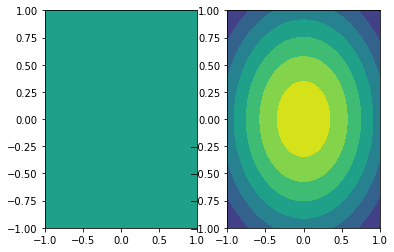

1 0


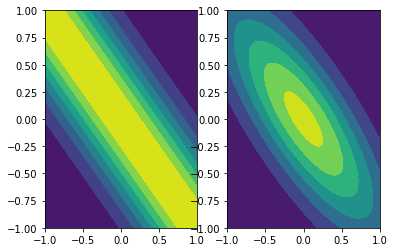

-0.5 -0.8


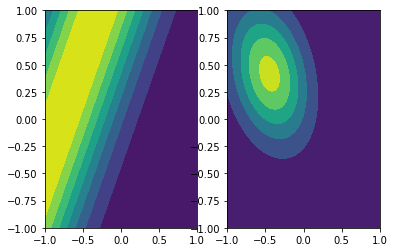

0.9 -0.1


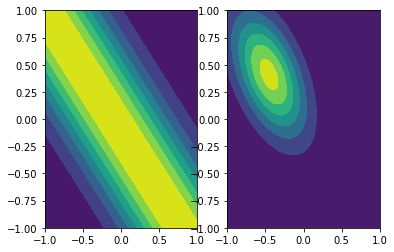

1.5 0.6


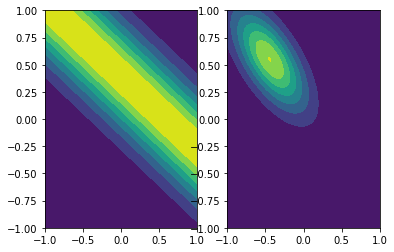

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_array = []
y_array = []

x_to_add = [1, -0.5, 0.9, 1.5]
y_to_add = [0, -0.8, -0.1, .6]


w_0 = np.linspace(-1, 1, 100)
w_1 = np.linspace(-1, 1, 100)
m = np.meshgrid(w_0, w_1)

for x, y in zip(x_to_add, y_to_add):
    f, axarr = plt.subplots(1, 2)
   
    likeliness = compute_likeliness_last(m[0], m[1])
    posterior = compute_posterior(m[0], m[1], 1)

    axarr[0].contourf(m[0], m[1], likeliness)

    axarr[1].contourf(m[0], m[1], posterior)
    plt.show()
    
    x_array.append(x)
    y_array.append(y)
    
    print(x, y)
    

f, axarr = plt.subplots(1, 2)
likeliness = compute_likeliness_last(m[0], m[1])
posterior = compute_posterior(m[0], m[1], 1)

axarr[0].contourf(m[0], m[1], likeliness)

axarr[1].contourf(m[0], m[1], posterior)
plt.show()
